In [5]:
# mnist dataset =  collection of images of handwritten digits 0-9

In [6]:
import numpy as np
import pandas as pd

In [7]:
v= pd.read_csv('train.csv')

In [8]:
v.head(1)

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  

[1 rows x 785 columns]

In [9]:
v.shape

(42000, 785)

In [10]:
v.sample()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
11013      4       0       0       0       0       0       0       0       0   

       pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  \
11013       0  ...         0         0         0         0         0   

       pixel779  pixel780  pixel781  pixel782  pixel783  
11013         0         0         0         0         0  

[1 rows x 785 columns]

In [11]:
# one image consists of 28*28 pixels in total 784  pixels ...
# they make every pixels  a column in the dataset...
# total we have 42k images ....and each image has 784 columns....
# so we have 43k*784 pixels in the dataset....

In [12]:
import matplotlib.pyplot as plt

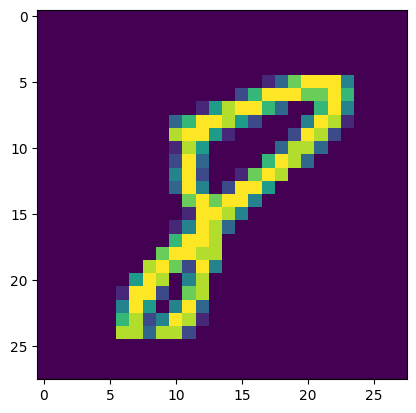

In [13]:
plt.imshow(v.iloc[18306,1:].values.reshape(28,28))

In [14]:
print(v.shape)

(42000, 785)


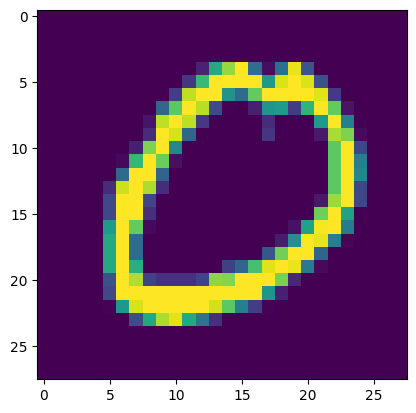

In [15]:
plt.imshow(v.iloc[13051,1:].values.reshape(28,28))

In [16]:
# basically we have converted 2 d to 1d ..because the image column we
# linning in the row one by one ....

In [17]:
x = v.iloc[:,1:]
y = v.iloc[:,0]

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [19]:
x_train.shape

(33600, 784)

In [20]:
from sklearn.neighbors import KNeighborsClassifier

# in knn what we are doing that is to finding out the distance
# from each and every images to images and to  finds out whom is most similar
# images to other images ...

# then we finds out that whom are the
# most similar images of my given images ...
# when we gives the test data which are accumulated test images
#

In [21]:
knn = KNeighborsClassifier()

In [22]:
knn.fit(x_train , y_train)

KNeighborsClassifier()

In [23]:
import time
start = time.time()
y_pred = knn.predict(x_test)
print(time.time() -start)

17.56983184814453


In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)*100


96.51190476190476

**Using PCA**

In [25]:
# now we are going to do pca accuracy will be same but
# number of diension por columns wil be lesser and still the accuracy
# will be the same.....

In [26]:
from sklearn.preprocessing import StandardScaler
# here we are doing scaling

In [27]:
scaler = StandardScaler()

In [28]:
x_train = scaler.fit_transform(x_train)

x_test = scaler.transform(x_test)

In [29]:
# from here we are doing pca

In [30]:
from sklearn.decomposition import PCA

pca = PCA(n_components=100)   # lowercase variable name



In [31]:
x_train.shape

(33600, 784)

In [32]:
x_train_trf = pca.fit_transform(x_train)
x_test_trf = pca.transform(x_test)

In [33]:
x_train.shape

(33600, 784)

In [34]:
x_train_trf.shape

(33600, 100)

In [35]:
knn  = KNeighborsClassifier()

In [36]:
knn.fit(x_train_trf , y_train)

KNeighborsClassifier()

In [37]:
y_pred = knn.predict(x_test_trf)

In [38]:
accuracy_score(y_test,y_pred)

0.9519047619047619

In [39]:
for i in range (1,785):
        pca = PCA(n_components = i)


In [40]:
x_train_trf = pca.fit_transform(x_train)
x_test_trf = pca.transform(x_test)


In [41]:
knn = KNeighborsClassifier()

knn.fit(x_train_trf , y_train)

y_pred = knn.predict(x_test_trf)

In [42]:
print(accuracy_score(y_test,y_pred))

0.9360714285714286


In [43]:
# lets see  visualisation of this data in 2d and 3 d

In [44]:
# transformation to a 2 d co0rdinate system
pca = PCA(n_components = 2)
x_train_trf = pca.fit_transform(x_train)
x_test_trf = pca.transform(x_test)


In [45]:
x_train_trf

array([[-0.84756762,  1.7467536 ],
       [-2.2090181 , -5.3966156 ],
       [-4.19081635,  0.60897468],
       ...,
       [ 4.46291537, -0.63837679],
       [-4.5016082 , -1.19691725],
       [ 0.11943076,  0.96090267]])

In [46]:
import plotly.express as px


In [53]:
y_train_trf = y_train.astype(str)
fig = px.scatter(x=x_train_trf[:,0],
                 y= x_train_trf[:,1],
                  color = y_train_trf,
                  color_discrete_sequence = px.colors.qualitative.G10)
fig.show()

In [48]:
# transforming in 3 d
pca = PCA(n_components = 3)
x_train_trf = pca.fit_transform(x_train)
x_test_trf = pca.transform(x_test)

In [49]:
x_train_trf

array([[-0.84756762,  1.7467536 ,  5.42085949],
       [-2.2090181 , -5.3966156 ,  1.87038904],
       [-4.19081635,  0.60897468,  6.87752512],
       ...,
       [ 4.46291537, -0.63837679,  4.81249498],
       [-4.5016082 , -1.19691725, -2.75720106],
       [ 0.11943076,  0.96090267, -1.35292383]])

In [50]:
y_train_trf = y_train.astype(str)
fig = px.scatter_3d(x=x_train_trf[:,0],
                    y= x_train_trf[:,1],
                    z = x_train_trf[:,2],
                    color = y_train_trf,)
fig.update_layout(
        margin=dict(l=0, r=0, t=0, b=0)
    )
fig.show()


In [51]:
y_train_trf = y_train.astype(str)
fig = px.scatter_3d(v,x=x_train_trf[:,0],
                    y=x_train_trf[:,1],
                    z=x_train_trf[:,2],
                    color = y_train_trf,
                    color_discrete_sequence = px.colors.qualitative.G10)
fig.show()

In [54]:
pca.explained_variance_

array([40.71663636, 29.14088312, 26.81721425])

In [55]:
pca.components_.shape
# 3 vectors ....784 dimensions

(3, 784)

In [55]:
# lets find out optimal number of principal required...

In [ ]:
# ev = lamara donates
# 784 = lamra1 , lamra2 , lamra3 ,......lamra784
# lamra1 states alone how much variance could able to explained
# alone this perticular values....
# now we find out every vector how much variance could able to explain
lamra1 /lamra1+lamra2+lamra3+lamra4+lamra5 *100
and total we want 90 percent of variance to be explained

example

